In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math

In [21]:
file = r'D:\UNI\MILJOETEK\4. semester\Sensitivity\Catalyst mix.xlsx'
file2 = r'D:\UNI\MILJOETEK\4. semester\Sensitivity\Catalyst sensitivity endpoint.xlsx'
sheet = 'Data'
sheet2 = 'Sheet2'
save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\Catalyst sensitivity'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)
data.head()

data2 = pd.read_excel(file2, sheet_name=sheet2)
data2.head()

,Mix,Ecosystem quality,Human health,Natural resources
0,0.5% Pd 99.5% Al2O3,0.000047,0.038756,99.158008
1,0.7% Pd 99.3% Al2O3,0.000065,0.053598,119.462054
2,1% Pd 99% Al2O3,0.000091,0.075861,149.918123


In [22]:
len(data['Mix'])

3

In [23]:

df_cols = data.columns
df_cols = df_cols.to_list()
df_cols1 = df_cols[1:]
df_cols2 = df_cols[0]

#print(CDU_cols)
df_norm = pd.DataFrame().reindex_like(data) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols1:
    #print(max(data[i]),i)
    scaling_factor = max(data[i])
    for j in range(len(data['Mix'])):
        df_norm[i][j] =data[i][j]/scaling_factor
        #print(data[i][j])
        #print(i, CDU_norm[i][j])
  



In [24]:
df_norm

,Mix,TAP,GWP,FETP,METP,TETP,FFP,FEP,MEP,HTPc,HTPnc,IRP,LOP,SOP,ODP,PMFP,HOFP,EOFP,WCP
0,NaN,0.506023,0.89625,0.999293,0.994804,0.803843,0.86425,0.988812,0.919501,0.980405,0.964520,0.872696,1.000000,0.548703,0.717529,0.513098,0.928901,0.929666,0.811378
1,NaN,0.703614,0.93775,0.999576,0.996882,0.882306,0.91855,0.993287,0.951701,0.988243,0.978712,0.923617,0.990324,0.729222,0.830517,0.707859,0.957341,0.957800,0.886827
2,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
for j in range(len(data['Mix'])):
    df_norm['Mix'][j] = data['Mix'][j]
    #print(i, CDU_norm[i][j])

# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns[1:]

C:\Users\rwint\AppData\Local\Temp\ipykernel_18948\573767878.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5% Pd 99.5% Al2O3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_norm['Mix'][j] = data['Mix'][j]


C:\Users\rwint\AppData\Local\Temp\ipykernel_18948\156044140.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


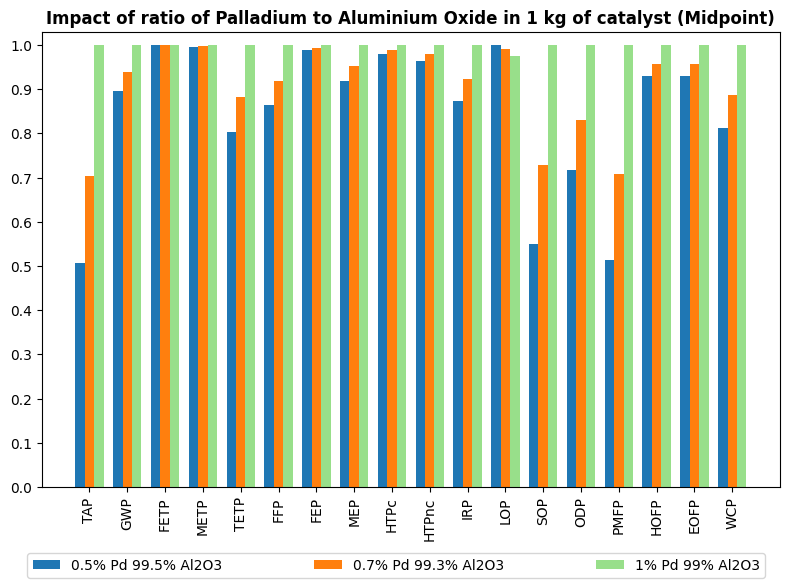

In [26]:
# Plotting
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]
fig, ax = plt.subplots(figsize=(8, 6))

num_processes = len(df_norm)
bar_width = 0.25  # Adjust as needed
index = np.arange(len(columns_to_plot))

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar(index + i * bar_width, values, bar_width, label=process, color=colors[i])


# Setting labels and title
#ax.set_xlabel('Characterization Impact',weight='bold')
ax.set_title('Impact of ratio of Palladium to Aluminium Oxide in 1 kg of catalyst (Midpoint)',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(columns_to_plot)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(df_norm['Mix'], bbox_to_anchor=(-0.02, -0.2, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0,  ncol=3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Catalyst_sensitivity_normalized.jpg'), bbox_inches='tight')
plt.show()

In [27]:

df_cols = data2.columns
df_cols = df_cols.to_list()
df_cols1 = df_cols[1:]
df_cols2 = df_cols[0]

#print(CDU_cols)
df_norm = pd.DataFrame().reindex_like(data2) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols1:
    #print(max(data[i]),i)
    scaling_factor = max(data2[i])
    for j in range(len(data2['Mix'])):
        df_norm[i][j] =data2[i][j]/scaling_factor
        #print(data[i][j])
        #print(i, CDU_norm[i][j])
  



In [28]:
for j in range(len(data['Mix'])):
    df_norm['Mix'][j] = data['Mix'][j]
    #print(i, CDU_norm[i][j])

# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns[1:]

C:\Users\rwint\AppData\Local\Temp\ipykernel_18948\573767878.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5% Pd 99.5% Al2O3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_norm['Mix'][j] = data['Mix'][j]


C:\Users\rwint\AppData\Local\Temp\ipykernel_18948\1660529688.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


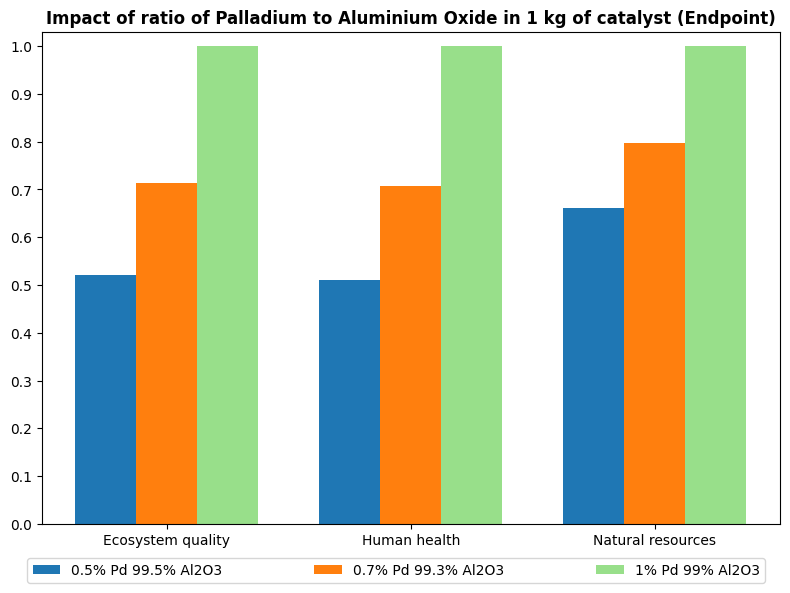

In [30]:
# Plotting
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]
fig, ax = plt.subplots(figsize=(8, 6))

num_processes = len(df_norm)
bar_width = 0.25  # Adjust as needed
index = np.arange(len(columns_to_plot))

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar(index + i * bar_width, values, bar_width, label=process, color=colors[i])


# Setting labels and title
#ax.set_xlabel('Characterization Impact',weight='bold')
ax.set_title('Impact of ratio of Palladium to Aluminium Oxide in 1 kg of catalyst (Endpoint)',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(columns_to_plot)

plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(df_norm['Mix'], bbox_to_anchor=(-0.02, -0.12, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0,  ncol=3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Catalyst_sensitivity_normalized_end.jpg'), bbox_inches='tight')
plt.show()